# Project Data visualization

In [2]:
import pandas as pd
import numpy as np
import math
import matplotlib.pyplot as plt

In [3]:
cities = pd.read_csv('./data/california_cities.csv')
cities.head()

,Unnamed: 0,city,latd,longd,elevation_m,elevation_ft,population_total,area_total_sq_mi,area_land_sq_mi,area_water_sq_mi,area_total_km2,area_land_km2,area_water_km2,area_water_percent
0,0,Adelanto,34.576111,-117.432778,875.0,2871.0,31765,56.027,56.009,0.018,145.107,145.062,0.046,0.03
1,1,AgouraHills,34.153333,-118.761667,281.0,922.0,20330,7.822,7.793,0.029,20.260,20.184,0.076,0.37
2,2,Alameda,37.756111,-122.274444,NaN,33.0,75467,22.960,10.611,12.349,59.465,27.482,31.983,53.79
3,3,Albany,37.886944,-122.297778,NaN,43.0,18969,5.465,1.788,3.677,14.155,4.632,9.524,67.28
4,4,Alhambra,34.081944,-118.135000,150.0,492.0,83089,7.632,7.631,0.001,19.766,19.763,0.003,0.01


## Basic informaton

### Số lượng các thành phố có trong bảng

In [4]:
cities['city'].count()

482

### Tổng dân số ở california

In [5]:
cities['population_total'].sum()

31279358

### Thành phố đông dân, thành phố ít dân nhất và địa điểm

In [6]:
max_popular = cities['population_total'].max() # Thành phố đông dân nhất
table1 = cities.loc[cities.population_total == max_popular,['city','population_total']].rename(columns = {
    'city':'Tên thành phố',
    'population_total':'Dân số'
})
table1

,Tên thành phố,Dân số
239,LosAngeles,3884307


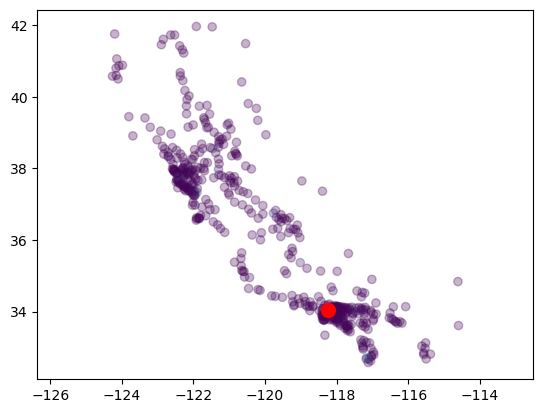

In [7]:
#Địa điểm thành phố đông dân nhất
fig, ax = plt.subplots()
lat, lon = cities['latd'], cities['longd']
plt.axis("equal");
sizes = cities['population_total']
longMax = cities.loc[cities.population_total == max_popular].longd
lattMax = cities.loc[cities.population_total == max_popular].latd#Lấy địa điểm long latt 
img1 = plt.scatter(lon, lat,c= sizes, cmap='viridis', alpha=0.3)
img2 = plt.scatter(longMax,lattMax, s=100 , c = "red")

In [8]:
min_popular = cities['population_total'].min() #Thành phố ít dân nhất
table2 = cities.loc[cities.population_total == min_popular,['city','population_total']].rename(columns = {
    'city':'Tên thành phố',
    'population_total':'Dân số'
})
table2

,Tên thành phố,Dân số
327,Pomona,1


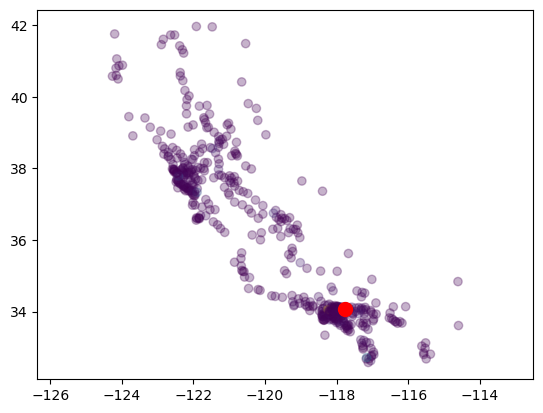

In [9]:
#Địa điểm thành phố ít dân nhất
fig, ax = plt.subplots()
lat, lon = cities['latd'], cities['longd']
plt.axis("equal");
sizes = cities['population_total']
#Lấy địa điểm long latt 
longMin = cities.loc[cities.population_total == min_popular].longd
lattMin = cities.loc[cities.population_total == min_popular].latd
img1 = plt.scatter(lon, lat,c= sizes, cmap='viridis', alpha=0.3)
img2 = plt.scatter(longMin,lattMin, s=100 , c = "red")

### Thành phố có mật độ dân cư cao nhất và thành phố có mật độ dân cư thấp nhất

In [10]:
#Thành phố có mật độ dân cư cao nhất
#tạo thêm cột tính mật độ
cities["population_density"] = cities["population_total"] / cities["area_total_km2"]
#tìm max
max_density = cities["population_density"].max()
population_density_max = cities.loc[cities.population_density == max_density,['city','population_density']].rename(columns = {
     'city':'Tên Thành phố',
    'population_density':'Mật độ dân số (người/km2)'
})
population_density_max 


,Tên Thành phố,Mật độ dân số (người/km2)
253,Maywood,8976.081258


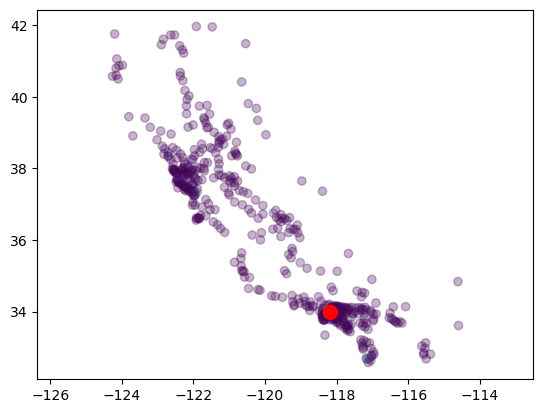

In [11]:
#Vị trí của thành phố có mật độ dân cư cao nhất
longtitude = cities.loc[cities.population_density == max_density]['longd']
lattitude = cities.loc[cities.population_density == max_density]['latd']
# vẽ biểu đồ
fig, ax = plt.subplots()
lat, lon = cities['latd'], cities['longd']
plt.axis("equal");
sizes = cities['population_total']
#Lấy địa điểm long latt 
img1 = plt.scatter(lon, lat,c= sizes, cmap='viridis', alpha=0.3)
img2 = plt.scatter(longtitude,lattitude, s=100 , c = "red")

In [12]:
#Thành phố có mật độ dân cư thấp nhất
#tạo thêm cột tính mật độ
cities["population_density"] = cities["population_total"] / cities["area_total_km2"]
#tìm min
min_density = cities["population_density"].min()
population_density_min = cities.loc[cities.population_density == min_density,['city','population_density']].rename(columns = {
     'city':'Tên Thành phố',
    'population_density':'Mật độ dân số (người/km2)'
})
population_density_min 

,Tên Thành phố,Mật độ dân số (người/km2)
327,Pomona,0.016814


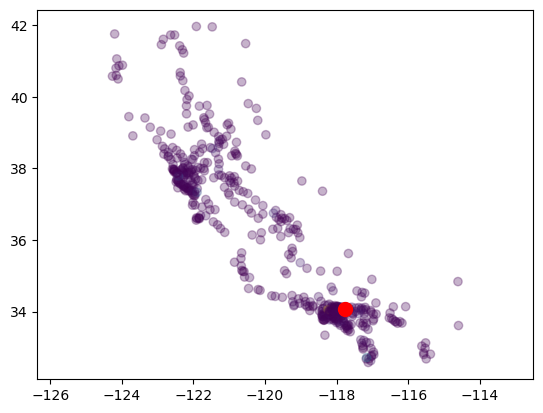

In [13]:
#Vị trí của thành phố có mật độ dân cư thấp nhất
longtitude = cities.loc[cities.population_density == min_density]['longd']
lattitude = cities.loc[cities.population_density == min_density]['latd']
# vẽ biểu đồ
fig, ax = plt.subplots()
lat, lon = cities['latd'], cities['longd']
plt.axis("equal");
sizes = cities['population_total']
#Lấy địa điểm long latt 
img1 = plt.scatter(lon, lat,c= sizes, cmap='viridis', alpha=0.3)
img2 = plt.scatter(longtitude,lattitude, s=100 , c = "red")

### Bản đồ phân bố dân cư

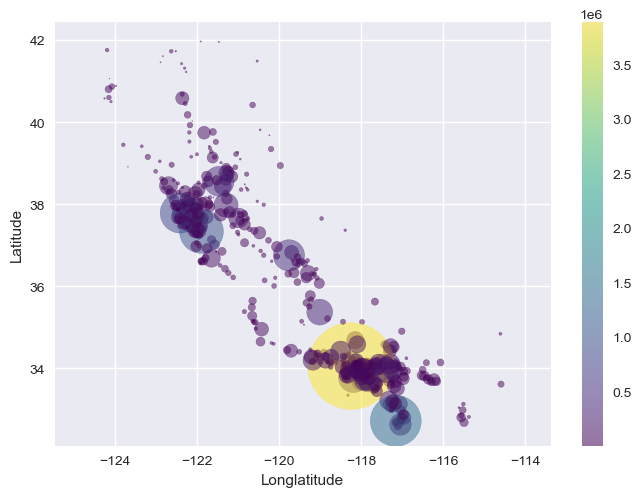

In [116]:
fig, ax = plt.subplots()
lat, lon = cities['latd'], cities['longd']
sizes = cities['population_total']
plt.axis("equal");

# phân bố dân số
img1 = plt.scatter(lon, lat, s= sizes/1000,c= sizes, cmap='viridis', alpha=0.5)
plt.xlabel("Longlatitude")
plt.ylabel("Latitude");
fig.colorbar(img1);

### Biểu đồ cột dân cư của Bang theo thành phố

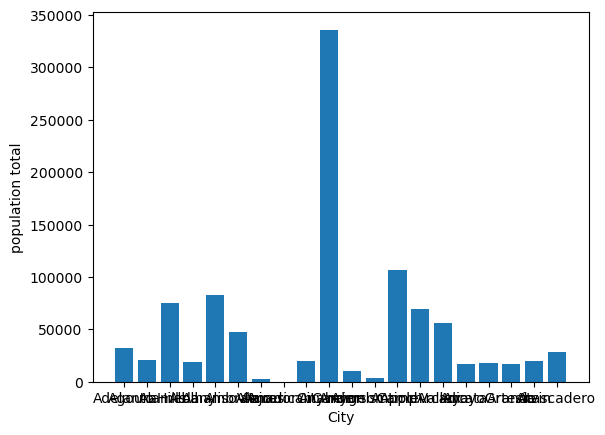

In [15]:
fig, ax = plt.subplots() #lấy 20 nhiều quá
result = cities.set_index('city')['population_total'].head(20).to_dict() #convert dạng dictionary 
ax.bar(result.keys(),result.values());
ax.set(xlabel = "City", ylabel = "population total");

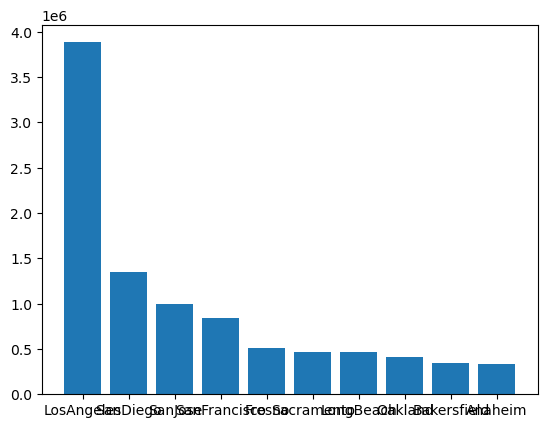

In [16]:
#10 thành phố có dân đông nhất và biểu đồ
top10Population = cities.sort_values(by = "population_total", ascending=False).head(10)
charTop10 = top10Population.set_index('city')['population_total'].to_dict()
fig, ax = plt.subplots()
ax.bar(charTop10.keys(),charTop10.values());

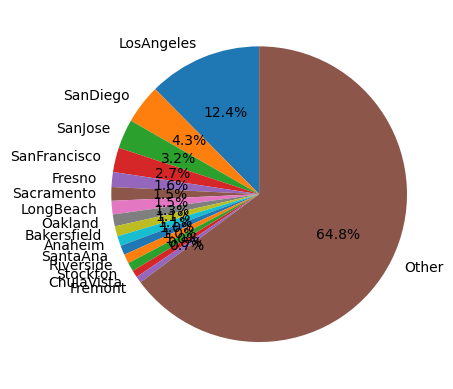

In [27]:
# biểu đồ tròn top15 đứng đầu và còn lại
total_population = cities['population_total'].sum()
cities['population_percent'] = (cities['population_total']/ total_population)*100
top15Population = cities.sort_values(by="population_total",ascending = False).head(15)
otherPopuplation =  100 - top15Population['population_percent'].sum()
top15Population = top15Population[['city','population_percent']]
new_row = pd.DataFrame({'city': ['Other'], 'population_percent': [otherPopuplation]})
top15Population = pd.concat([top15Population, new_row], ignore_index=True)
plt.pie(top15Population['population_percent'], labels=top15Population['city'], autopct='%1.1f%%', startangle=90);

### Vị trí 15 thành phố đông dân nhất

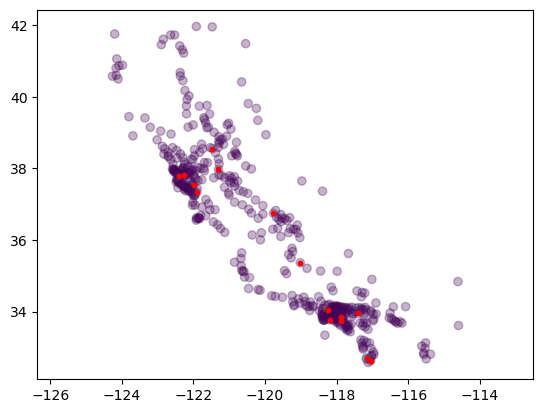

In [78]:
#Vẽ tất cả các thành phố
fig, ax = plt.subplots()
lat, lon = cities['latd'], cities['longd']
plt.axis("equal");
sizes = cities['population_total']
longMax = cities.loc[cities.population_total == max_popular].longd
lattMax = cities.loc[cities.population_total == max_popular].latd#Lấy địa điểm long latt 
img1 = plt.scatter(lon, lat,c= sizes, cmap='viridis', alpha=0.3)

#15 thành phố đông người nhất
top10Population = cities.sort_values(by = "population_total", ascending=False).head(15)
longTop = top10Population.longd
lattTop = top10Population.latd#Lấy địa điểm long latt 
img2 = plt.scatter(longTop,lattTop, s=10 , c = "red")

### Bản đồ mật độ dân cư

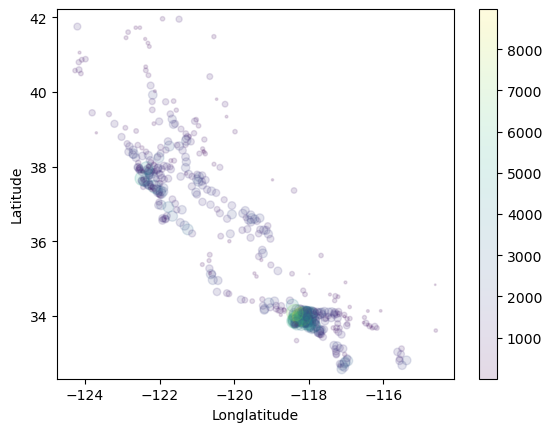

In [28]:
fig, ax = plt.subplots()
lat, lon = cities['latd'], cities['longd']
cities["population_density"] = cities["population_total"] / cities["area_total_km2"]
sizes = cities['population_density']
plt.axis("equal");

# phân bố dân số
img1 = plt.scatter(lon, lat, s= sizes/50,c= sizes, cmap='viridis', alpha=0.15)
plt.xlabel("Longlatitude")
plt.ylabel("Latitude");
fig.colorbar(img1);

### Khoảng cách giữa hai thành phố

In [29]:
#Lấy 2 thành phố bất kỳ
NameCity1 = "Adelanto"
NameCity2 = "Albany"
longtitudeCity1 , lattitudeCity1 = cities.loc[cities.city == NameCity1,'longd'].values[0], cities.loc[cities.city == NameCity1,'latd'].values[0]
longtitudeCity2 , lattitudeCity2 = cities.loc[cities.city == NameCity2,'longd'].values[0], cities.loc[cities.city == NameCity2,'latd'].values[0]

lat1 = math.radians(lattitudeCity1)
lat2 = math.radians(lattitudeCity2)
lon1 = math.radians(longtitudeCity1)
lon2 = math.radians(longtitudeCity2)

# Công thức Haversine
dlat = lat2 - lat1
dlon = lon2 - lon1
a = math.sin(dlat / 2)**2 + math.cos(lat1) * math.cos(lat2) * math.sin(dlon / 2)**2
c = 2 * math.atan2(math.sqrt(a), math.sqrt(1 - a))

# Bán kính trái đất (trung bình) = 6371 km
distance = 6371 * c

print(f"Khoảng cách thành phố {NameCity1} và {NameCity2} là {distance:.2f} km")

Khoảng cách thành phố Adelanto và Albany là 570.76 km


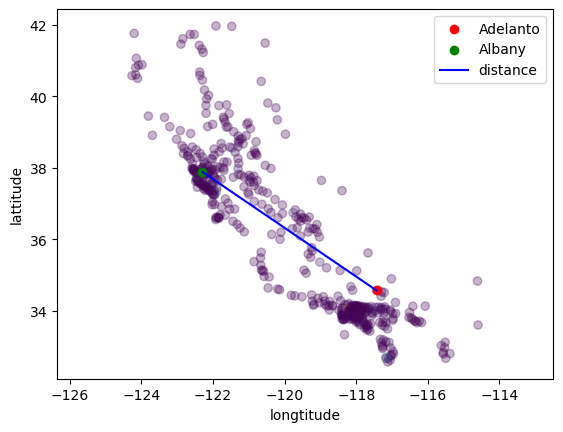

In [30]:
# bản đồ
fig, ax = plt.subplots()
lat, lon = cities['latd'], cities['longd']
plt.axis("equal");
sizes = cities['population_total']
#vẽ 2 thành phố và đường chim bay
img1 = plt.scatter(lon, lat,c= sizes, cmap='viridis', alpha=0.3)
img2 = plt.scatter(longtitudeCity1, lattitudeCity1,c = "red",label = NameCity1)
img3 = plt.scatter(longtitudeCity2, lattitudeCity2,c = "green",label = NameCity2)
plt.plot([longtitudeCity2,longtitudeCity1],[lattitudeCity2,lattitudeCity1], color = "blue",label = "distance");
plt.xlabel("longtitude")
plt.ylabel("lattitude")
plt.legend();

### Top diện tích

In [32]:
cities.head()

,Unnamed: 0,city,latd,longd,elevation_m,elevation_ft,population_total,area_total_sq_mi,area_land_sq_mi,area_water_sq_mi,area_total_km2,area_land_km2,area_water_km2,area_water_percent,population_density,population_percent
0,0,Adelanto,34.576111,-117.432778,875.0,2871.0,31765,56.027,56.009,0.018,145.107,145.062,0.046,0.03,218.907427,0.101553
1,1,AgouraHills,34.153333,-118.761667,281.0,922.0,20330,7.822,7.793,0.029,20.260,20.184,0.076,0.37,1003.455084,0.064995
2,2,Alameda,37.756111,-122.274444,NaN,33.0,75467,22.960,10.611,12.349,59.465,27.482,31.983,53.79,1269.099470,0.241268
3,3,Albany,37.886944,-122.297778,NaN,43.0,18969,5.465,1.788,3.677,14.155,4.632,9.524,67.28,1340.091840,0.060644
4,4,Alhambra,34.081944,-118.135000,150.0,492.0,83089,7.632,7.631,0.001,19.766,19.763,0.003,0.01,4203.632500,0.265635


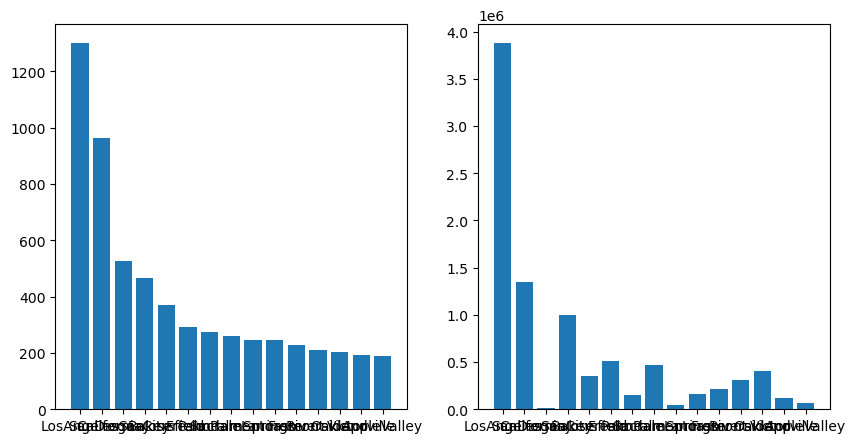

In [87]:
#Top 15 thành phố có diện tích lớn nhất và dân số ở đó
top15Area = cities.sort_values(by = "area_total_km2",ascending = False).head(15)
top15Area = top15Area[['city','area_total_km2','population_total']]
result = top15Area.set_index('city')['area_total_km2'].to_dict()
fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(10, 5))
ax[0].bar(result.keys(),result.values());
top15Area['area_total_km2'] = top15Area['area_total_km2'] /100
result2 = top15Area.set_index('city')['population_total'].to_dict()
ax[1].bar(result.keys(),result2.values());

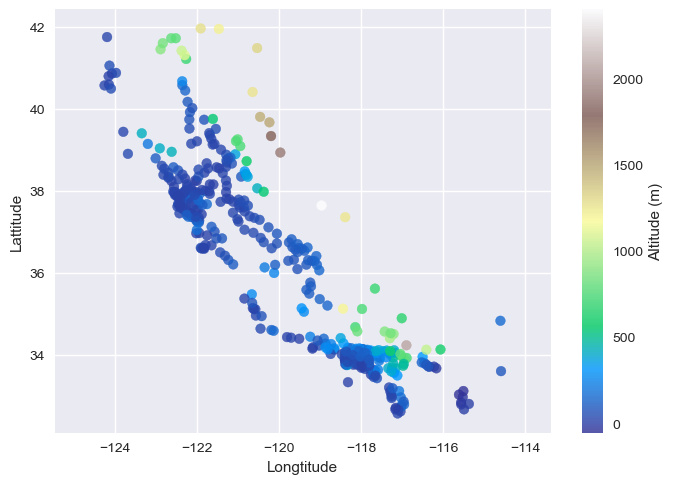

In [115]:
#độ cao của các thành phố
#Sửa lại cột độ cao tính theo m (mét)
cities['elevation_m'] = cities['elevation_ft'] * 0.3048
fig, ax = plt.subplots()
lat, lon = cities['latd'], cities['longd']
plt.axis("equal");
sizes = cities['elevation_m']
img1 = plt.scatter(lon, lat,c= sizes, cmap='terrain', alpha=0.8)
ax.set(xlabel = "Longtitude")
ax.set(ylabel = "Lattitude")
plt.colorbar(img1, label = "Altitude (m)");
#plt.style.use('seaborn-v0_8')

#plt.clim(500,1200)
plt.show()